In [1]:
!unzip /content/Lead+Scoring+Case+Study.zip

Archive:  /content/Lead+Scoring+Case+Study.zip
  inflating: Lead Scoring Assignment/Assignment Subjective Questions.docx  
  inflating: Lead Scoring Assignment/Leads Data Dictionary.xlsx  
  inflating: Lead Scoring Assignment/Leads.csv  


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Data

In [3]:
df = pd.read_csv("/content/Lead Scoring Assignment/Leads.csv")
print(df.shape)
df.head(2)

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


## Replacing Select with Nan

In [4]:
df = df.replace("Select",np.nan)
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Checking Target Distribution

In [6]:
df["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

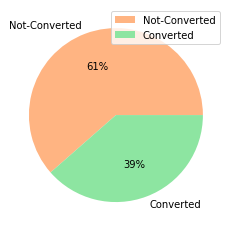

In [7]:
colors = sns.color_palette('pastel')[1:3]
data = df["Converted"].value_counts().to_list()
#create pie chart
plt.pie(data, labels = ["Not-Converted","Converted"], colors = colors, autopct='%.0f%%')
plt.legend(loc= "best")
plt.show()

# Checking Null Values

In [8]:
(df.isnull().sum()*100/len(df)).to_dict()

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.38961038961038963,
 'Do Not Email': 0.0,
 'Do Not Call': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.4826839826839826,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.4826839826839826,
 'Last Activity': 1.1147186147186148,
 'Country': 26.634199134199132,
 'Specialization': 36.58008658008658,
 'How did you hear about X Education': 78.46320346320347,
 'What is your current occupation': 29.11255411255411,
 'What matters most to you in choosing a course': 29.318181818181817,
 'Search': 0.0,
 'Magazine': 0.0,
 'Newspaper Article': 0.0,
 'X Education Forums': 0.0,
 'Newspaper': 0.0,
 'Digital Advertisement': 0.0,
 'Through Recommendations': 0.0,
 'Receive More Updates About Our Courses': 0.0,
 'Tags': 36.28787878787879,
 'Lead Quality': 51.59090909090909,
 'Update me on Supply Chain Content': 0.0,
 'Get updates on DM Content': 0.0,
 'Lead Profile': 74.18831168831169,
 'City': 39.70779220779221,
 'A

# Cleaning the Data

### Dropping Columns with Nan values greater tha 45%

In [9]:
df1 = df[["Prospect ID", "Lead Number"]]
for col in df.columns:
  if df[col].isnull().sum()*100/len(df) <45:
    df1[col] = df[col]

print(df1.shape)
df1.head(2)

(9240, 30)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


### Removing Columns with Single dominating value

In [10]:
#Do not call
print(df1["Do Not Call"].value_counts()*100/len(df))
df1.drop("Do Not Call",axis =1 ,inplace = True)

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64


In [11]:
#Country
print(df1["Country"].value_counts()*100/len(df))
df1.drop("Country",axis =1 ,inplace = True)

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [12]:
#What matters most to you in choosing a course
print(df1["What matters most to you in choosing a course"].value_counts()*100/len(df))
df1.drop("What matters most to you in choosing a course",axis =1 ,inplace = True)

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


In [13]:
#Search
print(df1["Search"].value_counts()*100/len(df))
df1.drop("Search",axis =1 ,inplace = True)

No     99.848485
Yes     0.151515
Name: Search, dtype: float64


In [14]:
#Magazine
print(df1["Magazine"].value_counts()*100/len(df))
df1.drop("Magazine",axis =1 ,inplace = True)

No    100.0
Name: Magazine, dtype: float64


In [15]:
#Newspaper Article
print(df1["Newspaper Article"].value_counts()*100/len(df))
df1.drop("Newspaper Article",axis =1 ,inplace = True)

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64


In [16]:
#X Education Forums
print(df1["X Education Forums"].value_counts()*100/len(df))
df1.drop("X Education Forums",axis =1 ,inplace = True)

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64


In [17]:
#Newspaper
print(df1["Newspaper"].value_counts()*100/len(df))
df1.drop("Newspaper",axis =1 ,inplace = True)

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64


In [18]:
#Digital Advertisement
print(df1["Digital Advertisement"].value_counts()*100/len(df))
df1.drop("Digital Advertisement",axis =1 ,inplace = True)

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64


In [19]:
#Through Recommendations
print(df1["Through Recommendations"].value_counts()*100/len(df))
df1.drop("Through Recommendations",axis =1 ,inplace = True)

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64


In [20]:
#What matters most to you in choosing a course
print(df1["Receive More Updates About Our Courses"].value_counts()*100/len(df))
df1.drop("Receive More Updates About Our Courses",axis =1 ,inplace = True)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


In [21]:
#Update me on Supply Chain Content
print(df1["Update me on Supply Chain Content"].value_counts()*100/len(df))
df1.drop("Update me on Supply Chain Content",axis =1 ,inplace = True)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64


In [22]:
#Get updates on DM Content
print(df1["Get updates on DM Content"].value_counts()*100/len(df))
df1.drop("Get updates on DM Content",axis =1 ,inplace = True)

No    100.0
Name: Get updates on DM Content, dtype: float64


In [23]:
#I agree to pay the amount through cheque
print(df1["I agree to pay the amount through cheque"].value_counts()*100/len(df))
df1.drop("I agree to pay the amount through cheque",axis =1 ,inplace = True)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


### combining different classes in variable

In [24]:
for col in df1.columns:
  print(df1[col].value_counts()*100/len(df))
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Landing Page Submission    52.878788
API    

In [25]:
df1.shape

(9240, 16)

In [26]:
(df1.isnull().sum()*100/len(df1)).to_dict()

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.38961038961038963,
 'Do Not Email': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.4826839826839826,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.4826839826839826,
 'Last Activity': 1.1147186147186148,
 'Specialization': 36.58008658008658,
 'What is your current occupation': 29.11255411255411,
 'Tags': 36.28787878787879,
 'City': 39.70779220779221,
 'A free copy of Mastering The Interview': 0.0,
 'Last Notable Activity': 0.0}

In [27]:
(df1["Lead Origin"].value_counts()/len(df)*100).to_dict()

{'Landing Page Submission': 52.87878787878788,
 'API': 38.74458874458874,
 'Lead Add Form': 7.770562770562771,
 'Lead Import': 0.5952380952380952,
 'Quick Add Form': 0.010822510822510822}

In [28]:
df2 = df1.copy()

In [29]:
#Lead Origin
df2["Lead Origin"] = df2["Lead Origin"].replace(["Lead Import","Quick Add Form","Lead Add Form"],"Lead Import and Others" )
print(df2["Lead Origin"].value_counts()/len(df2)*100)

Landing Page Submission    52.878788
API                        38.744589
Lead Import and Others      8.376623
Name: Lead Origin, dtype: float64


In [30]:
#Lead Origin
vals = [i for i,j in (((df2["Lead Source"].value_counts()/len(df2)*100)<6).to_dict()).items() if j == True]
df2["Lead Source"] = df2["Lead Source"].replace(vals,"Other_Origins" )
print(df2["Lead Source"].value_counts()/len(df2)*100)

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other_Origins      9.567100
Name: Lead Source, dtype: float64


In [31]:
#Last Activity
vals = [i for i,j in (((df2["Last Activity"].value_counts()/len(df2)*100)<6).to_dict()).items() if j == True]
df2["Last Activity"] = df2["Last Activity"].replace(vals,"Other_activity" )
df2["Last Activity"] = df2["Last Activity"].replace("SMS Sent","SMS_Sent" )
print(df2["Last Activity"].value_counts()/len(df2)*100)

Email Opened               37.196970
SMS_Sent                   29.707792
Other_activity             14.523810
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Name: Last Activity, dtype: float64


In [32]:
#Specialization
df2["Specialization"] = df2["Specialization"].replace(np.nan, "Temp")
df2["Specialization"] = df2["Specialization"].apply(lambda i : "Management Study" if "Management" in i else i)
df2["Specialization"] = df2["Specialization"].replace("Temp",np.nan)
vals = [i for i,j in (((df2["Specialization"].value_counts()/len(df2)*100)<4).to_dict()).items() if j == True]
df2["Specialization"] = df2["Specialization"].replace(vals,"Banking and Others" )
print(df2["Specialization"].value_counts()/len(df2)*100)

Management Study           46.028139
Banking and Others         13.030303
Business Administration     4.361472
Name: Specialization, dtype: float64


In [33]:
#What is your current occupation
vals = [i for i,j in (((df2["What is your current occupation"].value_counts()/len(df2)*100)<3).to_dict()).items() if j == True]
df2["What is your current occupation"] = df2["What is your current occupation"].replace(vals,"Student and Others" )
print(df2["What is your current occupation"].value_counts()/len(df2)*100)

Unemployed              60.606061
Working Professional     7.640693
Student and Others       2.640693
Name: What is your current occupation, dtype: float64


In [34]:
# Tags
vals = [i for i,j in (((df2["Tags"].value_counts()/len(df2)*100)<4).to_dict()).items() if j == True]
df2["Tags"] = df2["Tags"].replace(vals,"Closed by Horizzon and Others" )
print(df2["Tags"].value_counts()/len(df2)*100)

Will revert after reading the email    22.424242
Closed by Horizzon and Others          17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64


In [35]:
#Last Notable Activity
vals = [i for i,j in (((df2["Last Notable Activity"].value_counts()/len(df2)*100)<4).to_dict()).items() if j == True]
df2["Last Notable Activity"] = df2["Last Notable Activity"].replace(vals,"Page Visited and Others" )
print(df2["Last Notable Activity"].value_counts()/len(df2)*100)

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited and Others     9.025974
Name: Last Notable Activity, dtype: float64


In [36]:
#A free copy of Mastering The Interview
df2["A free copy of Mastering The Interview"] = df2["A free copy of Mastering The Interview"].replace("Yes","Sure" )
df2["A free copy of Mastering The Interview"] = df2["A free copy of Mastering The Interview"].replace("No","Never" )


In [37]:
#City
vals = [i for i,j in (((df2["City"].value_counts()/len(df2)*100)<8).to_dict()).items() if j == True]
df2["City"] = df2["City"].replace(vals,"Other Cities" )
print(df2["City"].value_counts()/len(df2)*100)

Mumbai               34.870130
Other Cities         17.283550
Thane & Outskirts     8.138528
Name: City, dtype: float64


### Dropping rows which have more than 5 nan values

In [38]:
df3 = df2.dropna(subset=list(df2.columns), thresh = len(df2.columns)-5)
df3.shape

(9226, 16)

## Imputing Data

In [39]:
(df3.isnull().sum()*100/len(df3)).to_dict()

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.33600693691740735,
 'Do Not Email': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.3331888142206807,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.3331888142206807,
 'Last Activity': 1.008020810752222,
 'Specialization': 36.483849989161065,
 'What is your current occupation': 29.145892044222848,
 'Tags': 36.2020377194884,
 'City': 39.616301755907216,
 'A free copy of Mastering The Interview': 0.0,
 'Last Notable Activity': 0.0}

#### Columns to impute data with heavy number of missing values are - 
#### * Lead Source
#### * Specialization
#### * What is your current occupation
#### * Tags
#### * City

#### We will be using Mode value to impute the missing data in a column


In [40]:
icols = ["Lead Source", "Specialization", "What is your current occupation", "Tags", "City"]
for col in icols:
  rev_dict = {j:i for i,j in df3[col].value_counts().items()}
  df3[col] = df3[col].replace(np.nan,rev_dict[max(rev_dict.keys())])

#### Final Null values after all Imputation

In [41]:
(df3.isnull().sum()*100/len(df3)).to_dict()

{'Prospect ID': 0.0,
 'Lead Number': 0.0,
 'Lead Origin': 0.0,
 'Lead Source': 0.0,
 'Do Not Email': 0.0,
 'Converted': 0.0,
 'TotalVisits': 1.3331888142206807,
 'Total Time Spent on Website': 0.0,
 'Page Views Per Visit': 1.3331888142206807,
 'Last Activity': 1.008020810752222,
 'Specialization': 0.0,
 'What is your current occupation': 0.0,
 'Tags': 0.0,
 'City': 0.0,
 'A free copy of Mastering The Interview': 0.0,
 'Last Notable Activity': 0.0}

### Dropping remaining Null Values

In [42]:
df4 = df3.dropna()
df4.shape

(9103, 16)

In [43]:
print("Total Rows Originally = ",len(df))
print("************************************************")
print("Total rows after all cleaning = ",len(df4))
print("************************************************")
print("Total rows Removed = ", len(df)-len(df4))
print("************************************************")
print("Percentage of rows removed = ", (len(df)-len(df4))/len(df)*100)
print("************************************************")
print("Percentage of rows remaining = ", len(df4)/len(df)*100)

Total Rows Originally =  9240
************************************************
Total rows after all cleaning =  9103
************************************************
Total rows Removed =  137
************************************************
Percentage of rows removed =  1.4826839826839828
************************************************
Percentage of rows remaining =  98.51731601731602


# EDA

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

## Univeriate Analysis

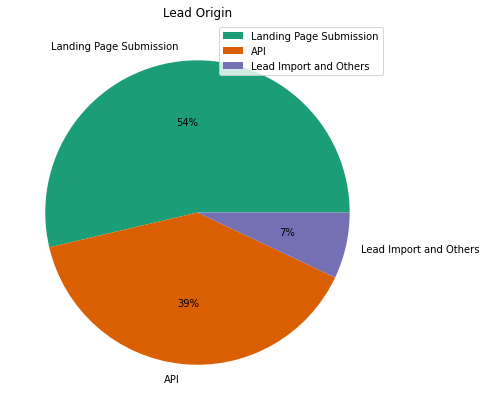

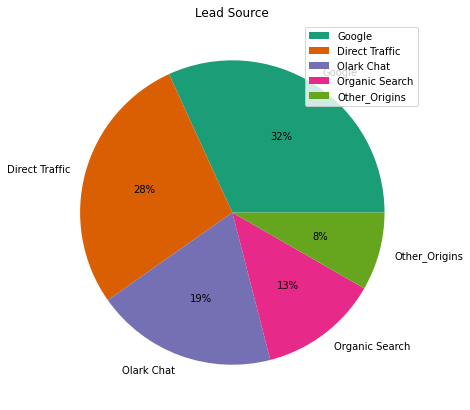

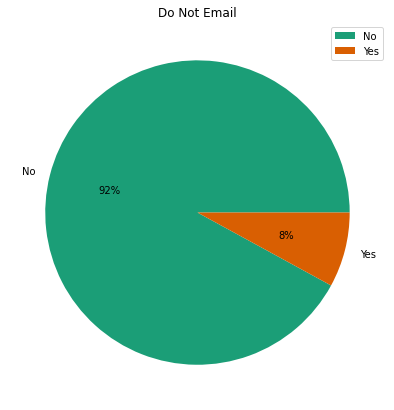

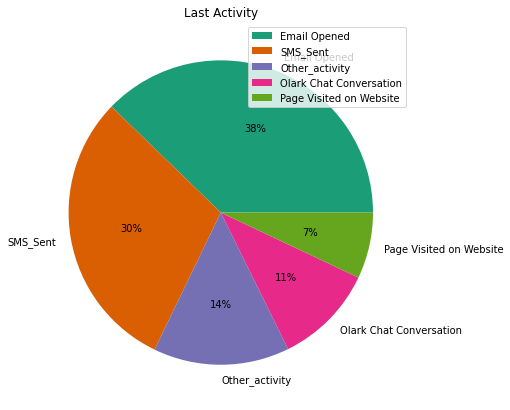

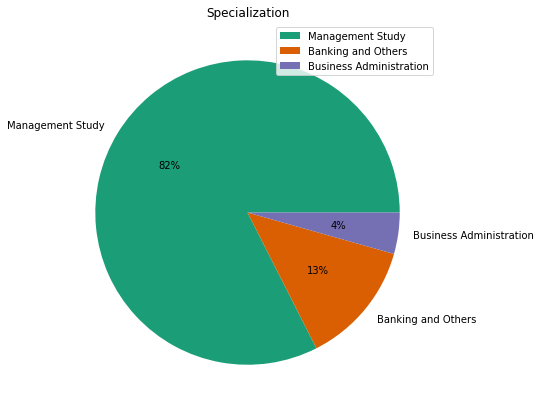

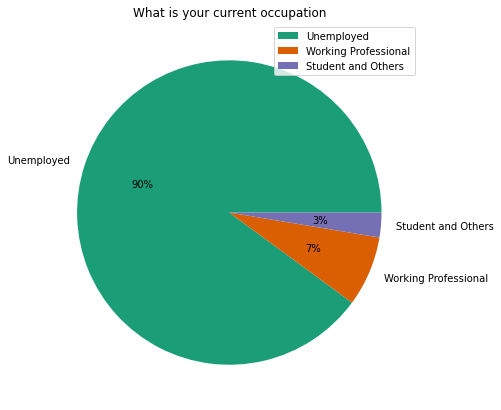

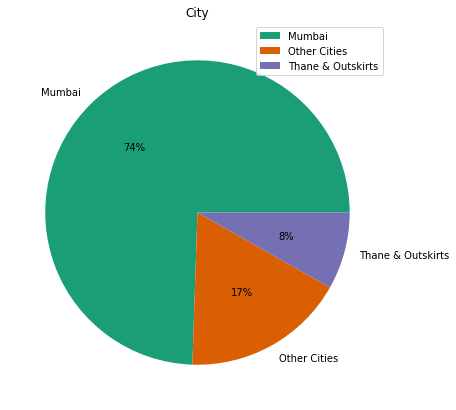

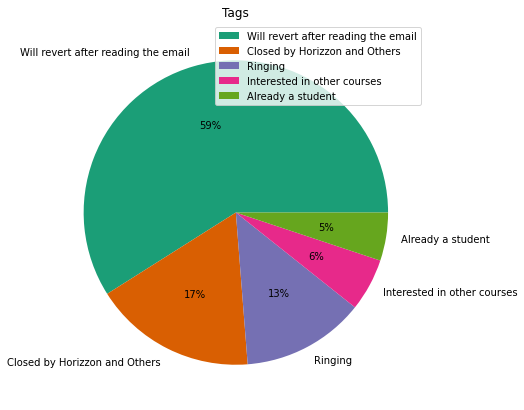

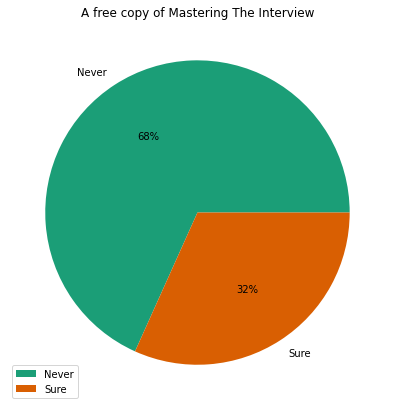

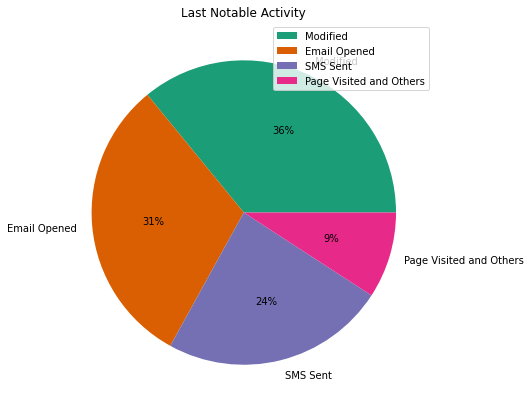

In [45]:
cat_col = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","City","Tags","A free copy of Mastering The Interview","Last Notable Activity"]
for col in cat_col:
  colors = sns.color_palette('Dark2')[0:]
  data = df4[col].value_counts().to_list()
  #create pie chart
  plt.figure(figsize=(7,7))
  plt.pie(data, labels = list(df4[col].value_counts().to_dict().keys()), colors = colors, autopct='%.0f%%')
  plt.title(col)
  plt.legend(loc= "best")
  plt.show()

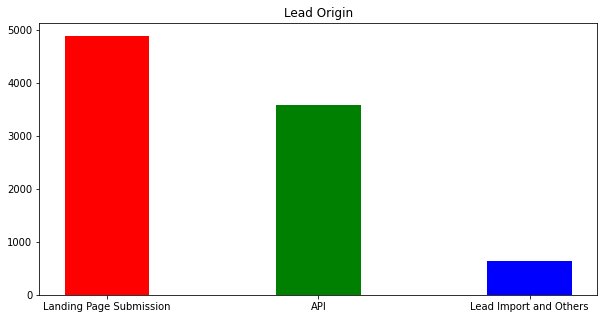

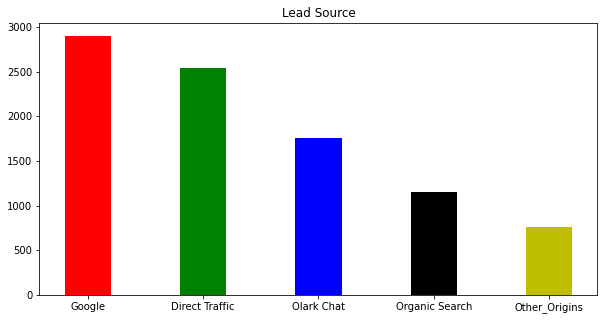

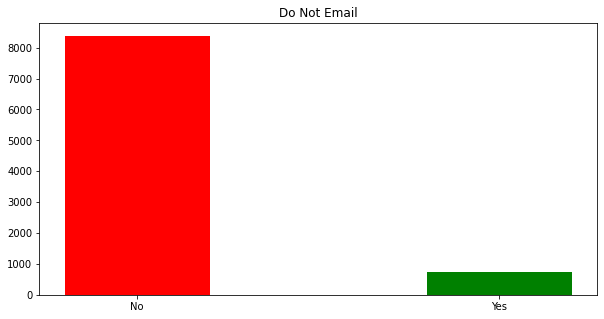

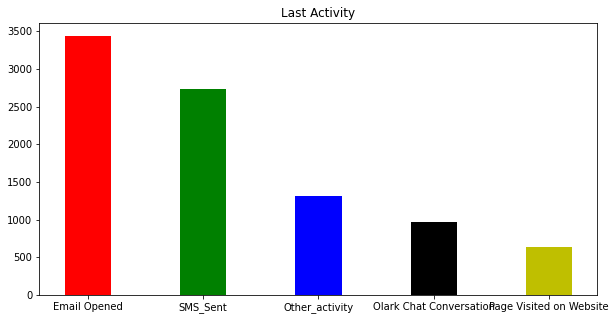

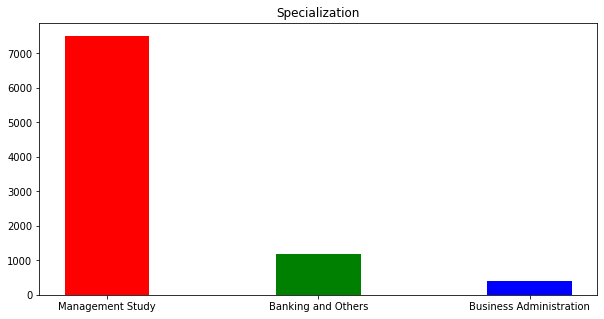

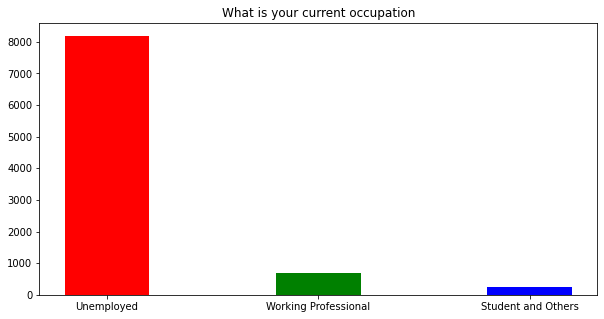

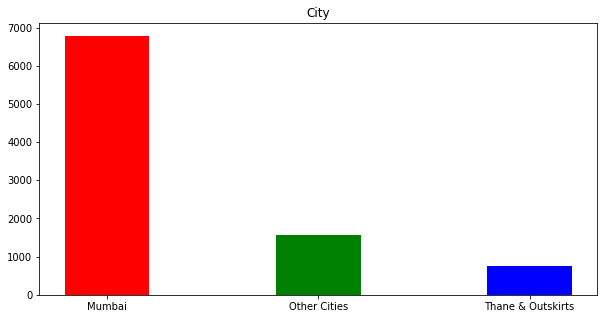

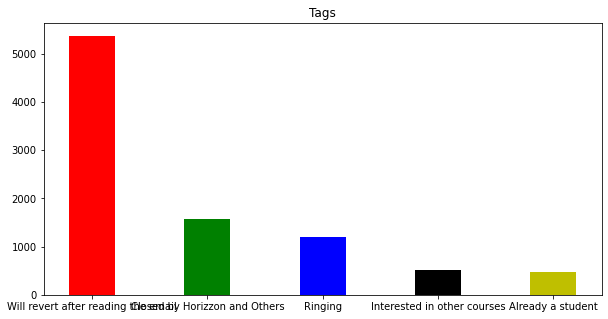

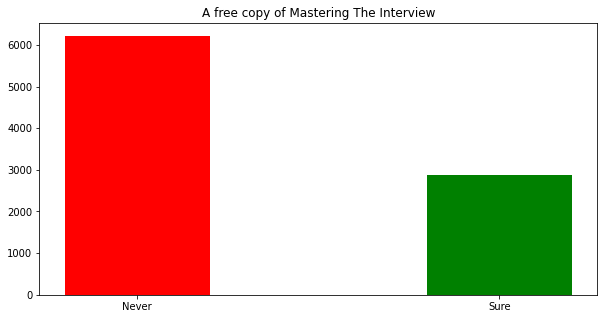

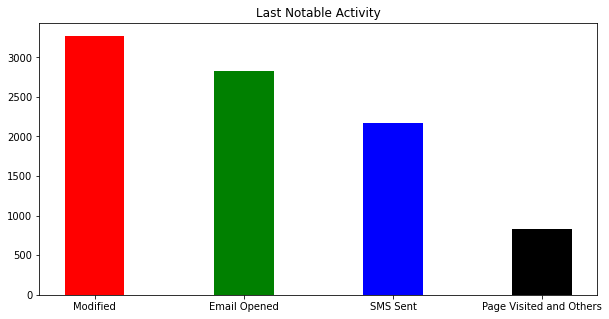

In [46]:
cat_col = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","City","Tags","A free copy of Mastering The Interview","Last Notable Activity"]
for col in cat_col:
  data = df4[col].value_counts().to_dict()
  courses = list(data.keys())
  values = list(data.values())
    
  fig = plt.figure(figsize = (10, 5))
  
  # creating the bar plot
  plt.bar(courses, values, color ='rgbkymc',
          width = 0.4)
  
  plt.title(col)
  plt.show()

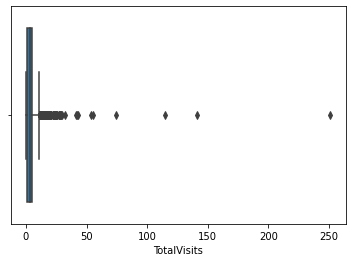

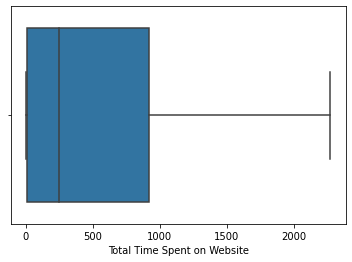

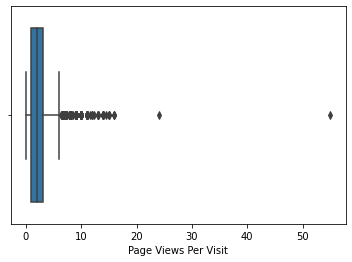

In [47]:
for i in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
  sns.boxplot(df4[i],orient = "v")
  plt.show()

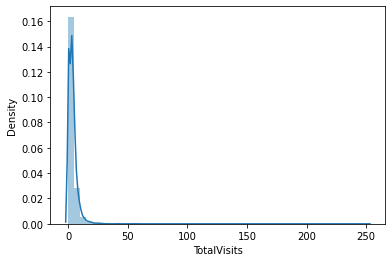

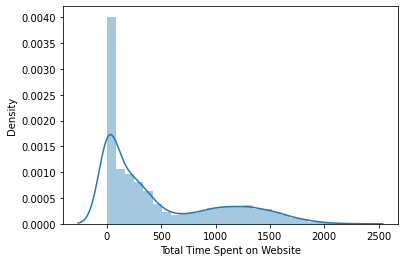

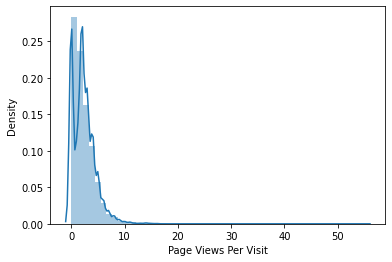

In [48]:
 for i in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
  sns.distplot(df4[i])
  plt.show()

### Bivariate Analysis

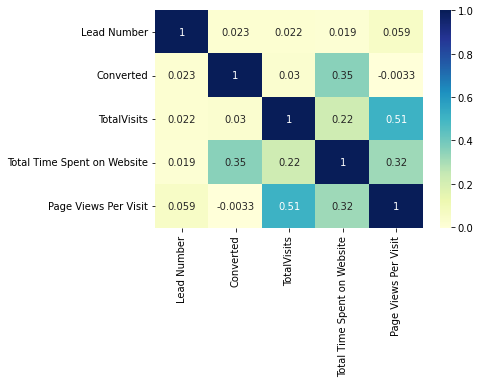

In [49]:
sns.heatmap(df4.corr(), cmap="YlGnBu", annot=True)
plt.show()

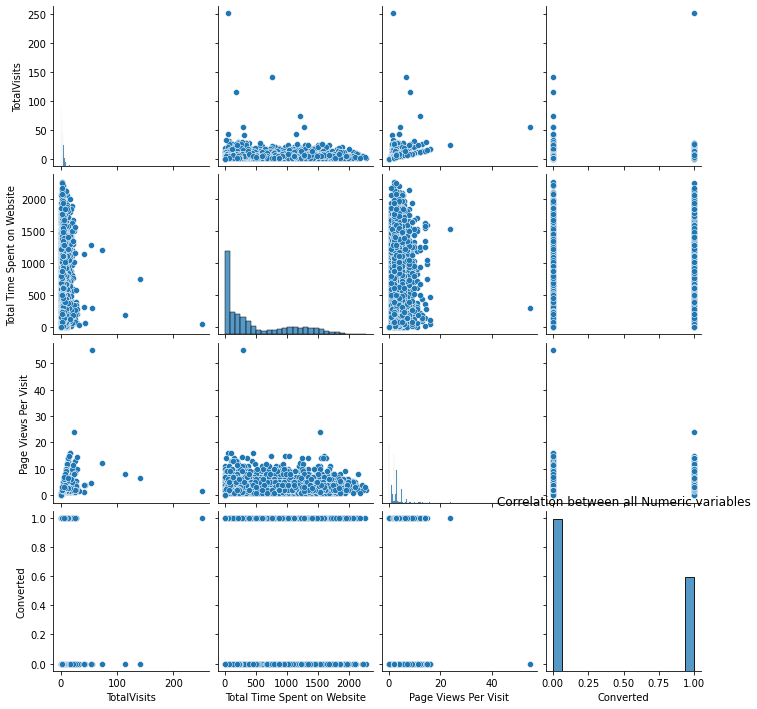

In [50]:
sns.pairplot(df4, vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Converted"])
plt.title("Correlation between all Numeric variables")
plt.show()

# Data Preperation

In [51]:
df4.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Management Study,Unemployed,Interested in other courses,Mumbai,Never,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Management Study,Unemployed,Ringing,Mumbai,Never,Email Opened


In [52]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [53]:
cat_col = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","City","Tags","A free copy of Mastering The Interview","Last Notable Activity"]

In [54]:
lstcol = [df4]
for col in cat_col:
  lstcol.append(pd.get_dummies(df4[col],drop_first=True))

In [55]:
df5 = pd.concat(lstcol, axis = 1)
df5.drop(cat_col, axis = 1, inplace = True)
df5.head(2)

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Import and Others,Google,Olark Chat,...,Other Cities,Thane & Outskirts,Closed by Horizzon and Others,Interested in other courses,Ringing,Will revert after reading the email,Sure,Modified,Page Visited and Others,SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
data_train, data_test, y_train, y_test = train_test_split(df5, df5["Converted"], test_size=0.3, random_state = 1000, stratify = df5["Converted"])
data_train.drop(["Converted"], inplace = True, axis = 1)
data_test.drop(["Converted"], inplace = True, axis = 1)
print("Number of data points in train data", data_train.shape)
print('-'*50)
print("Number of data points in test data", data_test.shape)

Number of data points in train data (6372, 30)
--------------------------------------------------
Number of data points in test data (2731, 30)


In [57]:
scaler = MinMaxScaler()

In [58]:
# Train Data
num_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head(2)

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Import and Others,Google,Olark Chat,Organic Search,...,Other Cities,Thane & Outskirts,Closed by Horizzon and Others,Interested in other courses,Ringing,Will revert after reading the email,Sure,Modified,Page Visited and Others,SMS Sent
8795,10cb3520-b834-4a6e-8e1f-14687f7e757c,582737,0.015936,0.119278,0.072727,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4366,c7140518-2ee5-446f-a6be-a2d5a09835f3,617867,0.019920,0.035211,0.090909,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [59]:
# Test Data
num_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
data_test[num_vars] = scaler.fit_transform(data_test[num_vars])
data_test.head(2)

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Import and Others,Google,Olark Chat,Organic Search,...,Other Cities,Thane & Outskirts,Closed by Horizzon and Others,Interested in other courses,Ringing,Will revert after reading the email,Sure,Modified,Page Visited and Others,SMS Sent
309,2dd8dc62-7e5b-48d4-a34e-c176ed0f0f02,657139,0.067568,0.116733,0.166667,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2595,c8d2c995-df48-42db-a885-96daa1e5a1ac,634642,0.054054,0.109188,0.266667,1,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0


# Modelling

In [60]:
X_train = data_train.drop(["Prospect ID","Lead Number"], axis = 1)
X_test = data_test.drop(["Prospect ID","Lead Number"], axis = 1)

In [61]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2124.2
Date:                Tue, 18 Oct 2022   Deviance:                       4248.4
Time:                        13:04:26   Pearson chi2:                 8.19e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Selecting top 10 variables

In [62]:
logreg = LogisticRegression()

In [63]:
rfe = RFE(logreg, n_features_to_select= 15)             
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Landing Page Submission', False, 11),
 ('Lead Import and Others', True, 1),
 ('Google', False, 8),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 7),
 ('Other_Origins', False, 9),
 ('Yes', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Other_activity', True, 1),
 ('Page Visited on Website', True, 1),
 ('SMS_Sent', False, 4),
 ('Business Administration', False, 13),
 ('Management Study', False, 12),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Other Cities', False, 10),
 ('Thane & Outskirts', False, 5),
 ('Closed by Horizzon and Others', True, 1),
 ('Interested in other courses', False, 6),
 ('Ringing', True, 1),
 ('Will revert after reading the email', True, 1),
 ('Sure', False, 14),
 ('Modified', False, 3),
 ('Page Visited and Others', True, 1),
 ('SMS Sent', True, 1)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Import and Others',
       'Olark Chat', 'Yes', 'Olark Chat Conversation', 'Other_activity',
       'Page Visited on Website', 'Unemployed', 'Working Professional',
       'Closed by Horizzon and Others', 'Ringing',
       'Will revert after reading the email', 'Page Visited and Others',
       'SMS Sent'],
      dtype='object')

#### Assessing the model with StatsModels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2133.1
Date:                Tue, 18 Oct 2022   Deviance:                       4266.1
Time:                        13:04:27   Pearson chi2:                 8.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [67]:
X_train_sm.drop(['const'], axis=1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Unemployed,10.80
12,Will revert after reading the email,6.83
10,Closed by Horizzon and Others,2.63
1,Total Time Spent on Website,2.34
11,Ringing,2.28
9,Working Professional,1.99
3,Olark Chat,1.95
0,TotalVisits,1.73
6,Other_activity,1.68
14,SMS Sent,1.63


#### Removing Unemployed as it has very high VIF

In [68]:
X_train_sm.drop(['Unemployed'], axis=1, inplace = True)

### Recreating Model with new data

In [69]:
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.8
Date:                Tue, 18 Oct 2022   Deviance:                       4283.7
Time:                        13:04:27   Pearson chi2:                 8.11e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [70]:
X_train_sm.drop(['const'], axis=1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Will revert after reading the email,3.17
1,Total Time Spent on Website,2.21
3,Olark Chat,1.84
0,TotalVisits,1.66
13,SMS Sent,1.62
6,Other_activity,1.55
9,Closed by Horizzon and Others,1.54
12,Page Visited and Others,1.54
7,Page Visited on Website,1.50
5,Olark Chat Conversation,1.49


#### All the VIFs are under 5 but p value of ringing is Very high so we will remove it

In [71]:
X_train_sm.drop(['Ringing'], axis=1, inplace = True)

In [72]:
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.8
Date:                Tue, 18 Oct 2022   Deviance:                       4283.7
Time:                        13:04:27   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [73]:
X_train_sm.drop(['const'], axis=1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Will revert after reading the email,2.73
1,Total Time Spent on Website,2.10
3,Olark Chat,1.77
0,TotalVisits,1.57
11,Page Visited and Others,1.54
6,Other_activity,1.51
12,SMS Sent,1.50
5,Olark Chat Conversation,1.49
7,Page Visited on Website,1.49
9,Closed by Horizzon and Others,1.43


#### All the Vif and p value are within range now so now we can build our final model

In [74]:
clf = LogisticRegression(random_state=0).fit(X_train_sm, y_train)
y_train_pred = clf.predict_proba(X_train_sm)

In [75]:
# Dropping Test set columns
X_test_sm = X_test[X_train_sm.columns]
X_test_sm.head(2)

,TotalVisits,Total Time Spent on Website,Lead Import and Others,Olark Chat,Yes,Olark Chat Conversation,Other_activity,Page Visited on Website,Working Professional,Closed by Horizzon and Others,Will revert after reading the email,Page Visited and Others,SMS Sent
309,0.067568,0.116733,0,0,0,0,0,0,0,0,1,0,0
2595,0.054054,0.109188,0,0,0,0,0,0,0,0,0,0,0


In [76]:
y_test_pred = clf.predict_proba(X_test_sm)

## Finding best cuttoff

In [77]:
cutdf = data_test[["Prospect ID",	"Lead Number"]]
cutdf["converted"] = y_test
cutdf["converted_prob"] = y_test_pred[:,1]
cutdf.head()

,Prospect ID,Lead Number,converted,converted_prob
309,2dd8dc62-7e5b-48d4-a34e-c176ed0f0f02,657139,1,0.265038
2595,c8d2c995-df48-42db-a885-96daa1e5a1ac,634642,0,0.006856
4850,4865cd9c-6b42-4f08-b2ce-9d53d3e3890c,613541,1,0.151347
1929,e3fd8d81-9e92-4348-ba74-58106918b925,640995,0,0.246648
1529,cb88de9e-545d-4d99-9147-529842216f6f,644129,1,0.636172


In [78]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cutdf[i]= cutdf.converted_prob.map(lambda x: 1 if x > i else 0)
cutdf.head()

,Prospect ID,Lead Number,converted,converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
309,2dd8dc62-7e5b-48d4-a34e-c176ed0f0f02,657139,1,0.265038,1,1,1,0,0,0,0,0,0,0
2595,c8d2c995-df48-42db-a885-96daa1e5a1ac,634642,0,0.006856,1,0,0,0,0,0,0,0,0,0
4850,4865cd9c-6b42-4f08-b2ce-9d53d3e3890c,613541,1,0.151347,1,1,0,0,0,0,0,0,0,0
1929,e3fd8d81-9e92-4348-ba74-58106918b925,640995,0,0.246648,1,1,1,0,0,0,0,0,0,0
1529,cb88de9e-545d-4d99-9147-529842216f6f,644129,1,0.636172,1,1,1,1,1,1,1,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(cutdf.converted, cutdf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.380081,1.000000,0.000000
0.1,0.1,0.700842,0.979769,0.529829
0.2,0.2,0.774808,0.933526,0.677496
0.3,0.3,0.822043,0.888247,0.781453
0.4,0.4,0.857561,0.818882,0.881276
0.5,0.5,0.864885,0.787091,0.912581
0.6,0.6,0.864885,0.736031,0.943887
0.7,0.7,0.842549,0.650289,0.960425
0.8,0.8,0.798609,0.511561,0.974601
0.9,0.9,0.749908,0.353565,0.992912


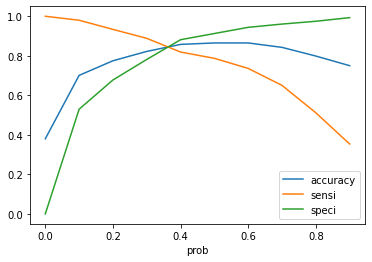

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

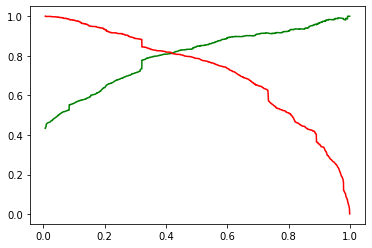

In [81]:
p, r, thresholds = metrics.precision_recall_curve(y_test, y_test_pred[:,1])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 0.4 seems to be the best threshold Value

# Model Accuracy and Other Parameters

### Confusion Matrix

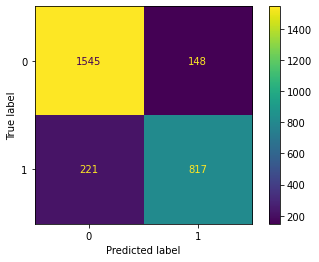

In [82]:
#Train
metrics.plot_confusion_matrix(clf,X_test_sm,y_test)

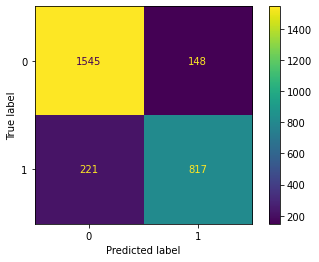

In [83]:
#test
metrics.plot_confusion_matrix(clf,X_test_sm,y_test)

In [84]:
confusion_test = metrics.confusion_matrix(y_test, y_test_pred[:,1] >0.4)
print("Test Recall is = ",confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print("Test precision is = ",confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print("Test F1 Score is = ",metrics.f1_score(y_test, y_test_pred[:,1] >0.4))

Test Recall is =  0.8188824662813102
Test precision is =  0.8087535680304472
Test F1 Score is =  0.813786500718047


### Test Recall is =  0.8188
### Test precision is =  0.8087
### Test F1 Score is =  0.8137

In [85]:
confusion_train = metrics.confusion_matrix(y_train, y_train_pred[:,1] >0.4)
print("Train Recall is = ",round(confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]),2))
print("Train precision is = ",round(confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]),2))
print("Train F1 Score is = ",round(metrics.f1_score(y_train, y_train_pred[:,1] >0.4),2))

Train Recall is =  0.83
Train precision is =  0.81
Train F1 Score is =  0.82


### Train Recall is =  0.8270
### Train precision is =  0.8090
### Train F1 Score is =  0.8179

# Generating Score Variable

In [86]:
df5.columns


Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Landing Page Submission', 'Lead Import and Others', 'Google',
       'Olark Chat', 'Organic Search', 'Other_Origins', 'Yes',
       'Olark Chat Conversation', 'Other_activity', 'Page Visited on Website',
       'SMS_Sent', 'Business Administration', 'Management Study', 'Unemployed',
       'Working Professional', 'Other Cities', 'Thane & Outskirts',
       'Closed by Horizzon and Others', 'Interested in other courses',
       'Ringing', 'Will revert after reading the email', 'Sure', 'Modified',
       'Page Visited and Others', 'SMS Sent'],
      dtype='object')

In [87]:
num_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
df6 = df5.copy()
df6[num_vars] = scaler.transform(df6[num_vars])
df7 = df6[X_train_sm.columns]
df7.head(2)

,TotalVisits,Total Time Spent on Website,Lead Import and Others,Olark Chat,Yes,Olark Chat Conversation,Other_activity,Page Visited on Website,Working Professional,Closed by Horizzon and Others,Will revert after reading the email,Page Visited and Others,SMS Sent
0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0
1,0.067568,0.299157,0,0,0,0,0,0,0,0,0,0,0


## Final Scored Data

In [88]:
pred_score = clf.predict_proba(df7)[:,1]*100
df5["Lead Score"] = [round(x,2) for x in pred_score]
score_df = df5[["Prospect ID",	"Lead Number", "Lead Score", "Converted"]]
score_df.head(5)

,Prospect ID,Lead Number,Lead Score,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0.37,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,1.67,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,82.17,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0.36,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,64.73,1
